In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [25]:
def inicializa_matriz_20x20():
    matriz = []
    for _ in range(20):
        linha = []
        for _ in range(20):
          linha = random.sample(range(1, 21), 20)  # números de 1 a 20, sem repetição
        matriz.append(linha)

    return matriz

In [3]:
matriz = inicializa_matriz_20x20()
data   = np.loadtxt('cidades.mat') # importando coordenadas x,y das cidades
roleta = [9, 8, 8, 7, 7, 7, 6, 6, 6, 6,
          5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4,
          3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
          1, 1, 1, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for linha in data:
    print(linha)

[0.77687122 0.55726533 0.65639441 0.60439895 0.10984792 0.30681839
 0.03642046 0.50750194 0.79819788 0.79896875 0.1432694  0.07110193
 0.7261315  0.22624105 0.62480412 0.54832279 0.39699388 0.07545496
 0.67595097 0.07429705]
[0.2794392  0.11661366 0.39053913 0.66616904 0.69857584 0.20730006
 0.50247213 0.07393869 0.67991802 0.39749278 0.14151256 0.12773617
 0.3719729  0.69033435 0.91890348 0.52333815 0.42525695 0.37166915
 0.99033329 0.15694232]


In [4]:
def monta_matriz_distancias():
  matriz_distancias = []
  for i in range(len(matriz)):
      linha = []
      for j in range(len(matriz[i]) - 1): # pega o tamanho do array matriz e subtrai 1 para não estourar o novo array
        eixo_x_cidade_atual   = data[0][matriz[i][j] - 1]
        eixo_x_proxima_cidade = data[0][matriz[i][j + 1] - 1]
        eixo_y_cidade_atual   = data[1][matriz[i][j] - 1]
        eixo_y_proxima_cidade = data[1][matriz[i][j + 1] - 1]

        distancia = np.sqrt((eixo_x_proxima_cidade - eixo_x_cidade_atual)**2 + (eixo_y_proxima_cidade - eixo_y_cidade_atual)**2)

        linha.append(distancia)
      matriz_distancias.append(linha)

  return matriz_distancias

In [5]:
def monta_matriz_aptidao():
    matriz_aptidao = []

    for i in range(len(matriz_distancias)):
        soma = sum(matriz_distancias[i]) # soma todas as distâncias da linha
        matriz_aptidao.append(soma)

    return np.array(matriz_aptidao)

In [6]:
def sorteia_casais():
  pares_sorteados = []

  for _ in range(5):
      while True:
        par = random.sample(roleta, 2)
        if par[0] != par[1]:
            pares_sorteados.append(par)
            break

  return pares_sorteados

In [8]:
# troca dois genes entre os filhos
def mutacao(filho):
    i, j = random.sample(range(len(filho)), 2)
    filho[i], filho[j] = filho[j], filho[i]

In [17]:
def tecnica_cycle():
  pares_sorteados = sorteia_casais()

  for i in range(len(pares_sorteados)):
    pai1    = pares_sorteados[i][0]
    pai2    = pares_sorteados[i][1]

    # faz cópia para não alterar os pais originais
    filho1  = matriz[pai1].copy()
    filho2  = matriz[pai2].copy()

    while True:
      posicao = random.randint(0, 19)
      if filho1[posicao] != filho2[posicao]:
        break

    while True:
      numero_troca1 = matriz[pai1][posicao]
      numero_troca2 = matriz[pai2][posicao]

      filho1[posicao] = numero_troca2
      filho2[posicao] = numero_troca1

      if filho1.count(numero_troca2) == 1: # indica que o número trocado aparece apenas uma vez, ou seja, não repete
        break
      else:
        # procura em qual posição está o número repetido
        for j in range(20):
          if j != posicao and filho1[j] == numero_troca2:
            posicao = j
            break

    mutacao(filho1)
    mutacao(filho2)

    # só adiciona se não estiver na matriz
    if filho1 not in matriz:
        matriz.append(filho1)
    if filho2 not in matriz:
        matriz.append(filho2)

Tamanho da População: 20
Número de Cidades: 20

População Inicial:
[15, 9, 16, 3, 17, 7, 6, 14, 13, 2, 4, 18, 10, 20, 5, 1, 8, 19, 11, 12]
[8, 10, 13, 12, 11, 14, 16, 3, 9, 1, 20, 5, 17, 7, 18, 15, 4, 6, 2, 19]
[20, 6, 3, 1, 17, 14, 11, 19, 16, 10, 8, 9, 4, 2, 5, 7, 12, 13, 15, 18]
[15, 9, 4, 13, 20, 7, 2, 16, 11, 8, 5, 6, 10, 1, 19, 3, 17, 14, 18, 12]
[10, 2, 3, 20, 8, 14, 19, 6, 11, 16, 7, 12, 5, 9, 1, 4, 18, 13, 17, 15]
[20, 10, 7, 18, 4, 14, 15, 12, 6, 16, 5, 13, 17, 8, 19, 3, 9, 1, 11, 2]
[20, 15, 7, 13, 14, 2, 19, 10, 16, 18, 17, 3, 11, 1, 4, 12, 6, 9, 5, 8]
[17, 5, 11, 13, 15, 9, 3, 12, 8, 10, 6, 16, 20, 7, 18, 4, 19, 14, 1, 2]
[7, 11, 18, 9, 6, 14, 13, 12, 10, 8, 20, 2, 3, 1, 17, 15, 5, 16, 19, 4]
[13, 9, 18, 2, 17, 11, 10, 14, 5, 12, 1, 16, 15, 20, 3, 8, 4, 19, 6, 7]
[9, 15, 4, 20, 17, 18, 3, 19, 2, 11, 8, 12, 6, 14, 1, 10, 5, 7, 13, 16]
[13, 15, 12, 20, 7, 2, 16, 10, 4, 8, 5, 18, 3, 9, 6, 14, 1, 19, 11, 17]
[10, 3, 6, 5, 14, 8, 2, 13, 20, 4, 19, 17, 15, 7, 18, 1, 9, 11, 16, 1

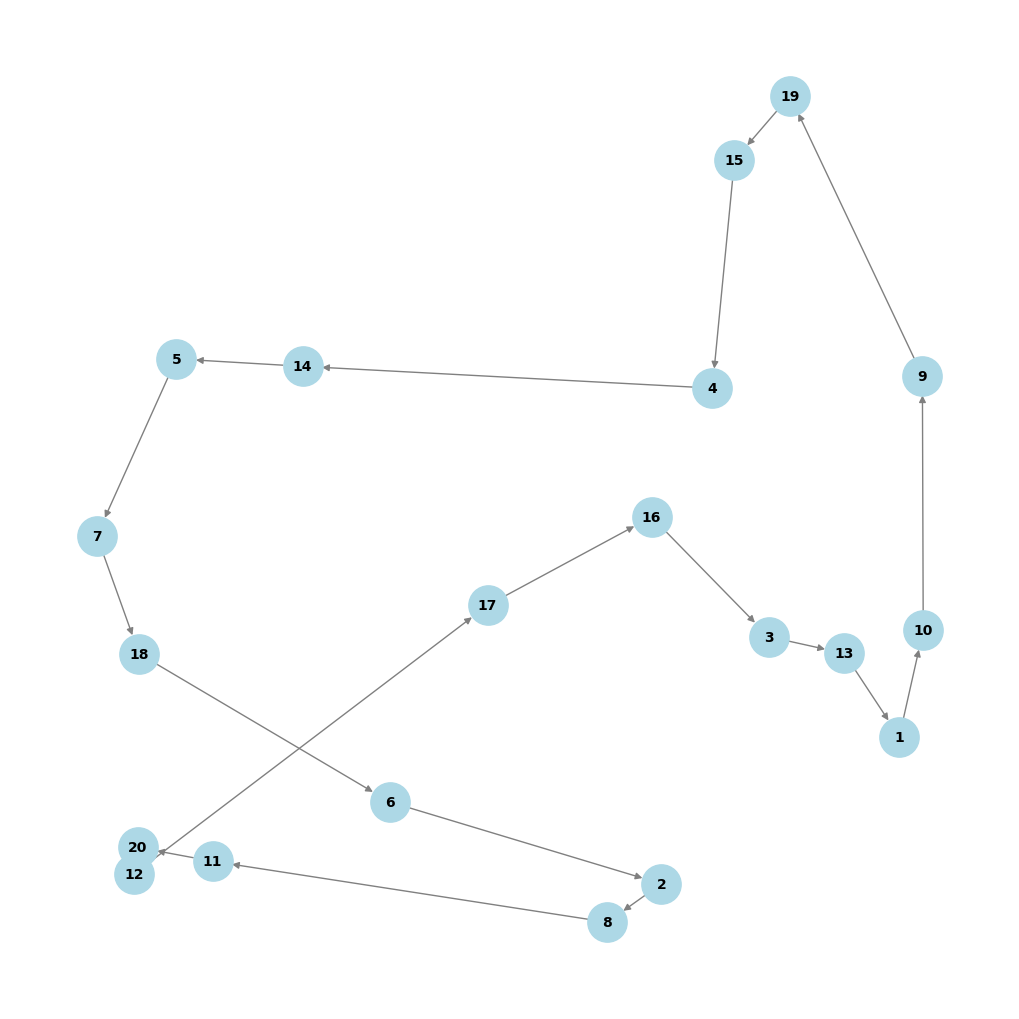

In [28]:
matriz = inicializa_matriz_20x20()

print("Tamanho da População:", len(matriz))
print("Número de Cidades:", len(matriz[0]))
print("\nPopulação Inicial:")
for linha in matriz:
  print(linha)

for _ in range(10000):
  # duplica a primeira coluna em uma nova coluna 21
  for linha in matriz:
      linha.append(linha[0])

  matriz_distancias = monta_matriz_distancias()

  indices_ordenados = np.argsort(monta_matriz_aptidao())  # índices dos menores para os maiores
  matriz = [matriz[i] for i in indices_ordenados] # reordena a matriz principal com base na aptidão

  matriz = matriz[:10] # mantém somente as 10 primeiras linhas
  matriz = [linha[:-1] for linha in matriz] # remove a última coluna de cada linha

  tecnica_cycle()


matriz_distancias = monta_matriz_distancias()
indices_ordenados = np.argsort(monta_matriz_aptidao())
matriz = [matriz[i] for i in indices_ordenados]
# recalcula as aptidões já com a matriz ordenada
aptidoes = monta_matriz_aptidao()

print("\nPopulação Final:")
for linha in matriz:
  print(linha)

print("\nMelhor solução:", matriz[0])
print("Melhor custo:", aptidoes[0])

# ----------- GERA O GRAFO COM O MELHOR CAMINHO ------------------
posicoes = {i + 1: (data[0][i], data[1][i]) for i in range(len(matriz))}

G = nx.DiGraph()
G.add_nodes_from(posicoes.keys())

# Cria arestas do percurso
arestas = [(matriz[0][i], matriz[0][(i + 1) % len(matriz)]) for i in range(len(matriz))]
G.add_edges_from(arestas)

# Desenha o grafo
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos=posicoes,
    with_labels=True,
    node_color='lightblue',
    node_size=800,
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    arrows=True
)
plt.grid(True)
plt.show()